In [1]:
# import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in data
logins = pd.read_json('logins.json')

In [3]:
# Check a sample of logins data
logins.sample(10)

,login_time
24861,1970-02-06 16:25:32
69186,1970-03-21 21:17:50
61902,1970-03-15 23:36:06
27907,1970-02-09 11:39:34
10381,1970-01-16 21:16:07
3597,1970-01-07 11:30:38
46492,1970-03-01 04:55:11
45324,1970-02-28 14:02:14
47988,1970-03-03 10:39:36
77148,1970-03-29 03:45:34


In [4]:
# Check first and last represented logins
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [80]:
# Switch index to timestamp
logins_switched = pd.Series(logins.index,index=logins.login_time)
logins_switched.head()

login_time
1970-01-01 20:13:18    0
1970-01-01 20:16:10    1
1970-01-01 20:16:37    2
1970-01-01 20:16:36    3
1970-01-01 20:26:21    4
dtype: int64

In [81]:
# Create 15-minute bins
logins_agg = pd.DataFrame(logins_switched.resample(rule='15min',group_keys=True).count(),columns=['count'])
logins_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [100]:
# Find daily cycle
daily_cycle = logins_agg.groupby(logins_agg.index.time).sum()
daily_cycle.head()

,count
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549


In [117]:
# Use a datetime to make the time series graphable
daily_cycle['time'] = pd.to_datetime('1970-01-01 ' + daily_cycle.index.astype(str))
daily_cycle.head()

,count,time
00:00:00,1439,1970-01-01 00:00:00
00:15:00,1547,1970-01-01 00:15:00
00:30:00,1525,1970-01-01 00:30:00
00:45:00,1482,1970-01-01 00:45:00
01:00:00,1549,1970-01-01 01:00:00


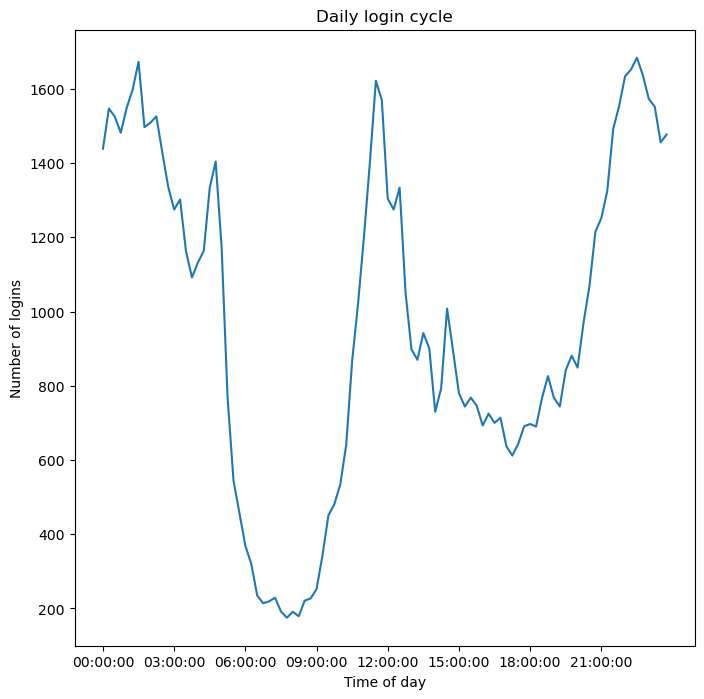

In [140]:
# Plot timeseries as lineplot
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(daily_cycle['time'],daily_cycle['count'])
ax.set_xticks(daily_cycle.time[::12])
ax.set_xticklabels(daily_cycle.index[::12])
plt.title("Daily login cycle")
plt.xlabel("Time of day")
plt.ylabel("Number of logins")
plt.show()

In [150]:
daily_cycle.iloc[30]

count                    192
time     1970-01-01 07:30:00
Name: 07:30:00, dtype: object